In [43]:
import struct
import os
import numpy as np
import xarray as xr

# Working with `bin` files 

Each grid cell in the model is initialized with its own values. For example, if we have a 30x30 set of grid cells, 
we will need to create a bin file for each tracer that is also 30x30. 

In [40]:
# GOAL: open the file for setting initial values for NO2 from the global darwin run 
no3_file_name = "/Users/birdy/Documents/eaps_research/julia stuff/Dar_One/ipython_notebooks/darwin_bin_files/ptr03_run33_4_28800.bin"

# initial values for the 360x160x23 grid (lon, lat, depth)
no3_bin = open_bin_file_float(no3_file_name)

no3_bin = np.array(no3_bin).reshape(360,160,23)


In [41]:
no3_bin[205, 130]

array([0.0007881 , 0.00078204, 0.00076508, 0.00075624, 0.00075642,
       0.00077227, 0.00079282, 0.00079824, 0.00078987, 0.00080058,
       0.0008436 , 0.0008915 , 0.00089969, 0.00089488, 0.00090055,
       0.00083883, 0.00077051, 0.00070406, 0.00069073, 0.00070193,
       0.00071195, 0.00071937, 0.00073418])

In [38]:
# GOAL: open the file for setting initial values for biomass from the global darwin run 
biomass_file_name = "/Users/birdy/Documents/eaps_research/julia stuff/Dar_One/ipython_notebooks/darwin_bin_files/biomass_run33_4_28800.bin"

# initial values for the 360x160x23 grid (lon, lat, depth)
biomass_bin = open_bin_file_float(biomass_file_name)

biomass_bin = np.array(biomass_bin).reshape(360,160,23)


In [39]:
biomass_bin[205, 130]

array([3.89177512e-05, 3.85312924e-05, 3.78081822e-05, 3.71066344e-05,
       3.62374121e-05, 3.58786783e-05, 3.62585633e-05, 3.66580898e-05,
       3.67217581e-05, 3.73341463e-05, 3.89836314e-05, 4.05421633e-05,
       4.16835792e-05, 4.28204621e-05, 4.38299103e-05, 4.39371033e-05,
       4.35402981e-05, 4.29526954e-05, 4.35667134e-05, 4.45915321e-05,
       4.50661537e-05, 4.51649903e-05, 4.56751732e-05])

In [34]:
# GOAL: for each ed and es file, create one that is 12x1 filled with a constant value 

# index for choosing which value to use (might want to change it in the future to be at equator)
lon = 200
lat = 100
month = 0
# NOTE: must be even(?) num characters, something mod 3?
#output_folder = f'constant_{lon}_{lat}_0{month}XXX'
output_folder = f'cons_{lon}_{lat}'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in os.listdir('original/'):
    file = "original/" + file
    if 'edp' in file:
        single_value = get_single_value(file, lon, lat, month)
        print("chosen value: ", single_value)
        new_data = [single_value] * 12
        new_file_name = file[file.index('edp'):file.index('edp')+5]
        new_file_name = 'single_box_' + new_file_name + '.bin'
        fout = open(output_folder + "/" + new_file_name, 'wb')
        fout.write(struct.pack('>' + 'i'*12, *new_data))
        fout.close()
    elif 'esp' in file:
        single_value = get_single_value(file, lon, lat, month)
        print("chosen value: ", single_value)
        new_data = [single_value] * 12
        new_file_name = file[file.index('esp'):file.index('esp')+5]
        new_file_name = 'single_box_' + new_file_name + '.bin'
        fout = open(output_folder + "/" + new_file_name, 'wb')
        fout.write(struct.pack('>' + 'i'*12, *new_data))
        fout.close()

chosen value:  1086960465
chosen value:  1073251418
chosen value:  1082491478
chosen value:  1088289182
chosen value:  1087253494
chosen value:  1068720605
chosen value:  1088503822
chosen value:  1084210612
chosen value:  1087888220
chosen value:  1077525532
chosen value:  1082799005
chosen value:  1087996106
chosen value:  1087839037
chosen value:  1072614427
chosen value:  1084305329
chosen value:  1083495588
chosen value:  1088553295
chosen value:  1077676039
chosen value:  1078989945
chosen value:  1081930094
chosen value:  1083158196
chosen value:  1086163739
chosen value:  1080108728
chosen value:  1084098185
chosen value:  1088203485
chosen value:  1080546301


In [25]:
# lon: 0 - 359
# lat = 0 - 159 (0=south, above 180 is northern hemisphere)
# month = 0-11
def get_single_value(file_name, lon, lat, month):
    with open(file_name, mode='rb') as file: # b is important -> binary
        file_content = file.read()
    bin_contents = struct.unpack(">" + "i" * (len(file_content) // 4), file_content)
    contents = np.array(bin_contents).reshape(360, 160, 12)
    return contents[lon, lat, month]

# Create bin files: testing 2x2 grid

Using a global darwin run, create 2x2 bin file for each tracer. 

71 total files 

In [48]:
seed_file_3d = "/Users/birdy/Documents/eaps_research/gcm_analysis/gcm_data/darwin_weekly_seasonal/3d.nc"
seed_ds_3d = xr.open_dataset(seed_file_3d)
seed_ds_3d = seed_ds_3d.rename({"Zmd000023":"Z"})

In [74]:
# test writing to file 
data = seed_ds_3d["TRAC21"].sel(X=203.5, Y=[25.5, 55.5]).isel(Z=0, T=[20, 40]).data.flatten()
print(data)
fout = open("bin_test.bin", 'wb')
fout.write(struct.pack('>' + 'f'*4, *data))
fout.close()

[2.2048320e-01 6.4094094e-09 1.3095756e-01 2.9878964e-09]


In [75]:
# test reading file 
file_name = "bin_test.bin"
open_bin_file_float(file_name)

(0.22048319876194,
 6.409409447627468e-09,
 0.13095755875110626,
 2.9878963747620446e-09)

In [77]:
# doing it for each one... 
for i in range(1, 71):
    tracer_name = f"TRAC0{i}" if i<10 else f"TRAC{i}" 
    data = seed_ds_3d[tracer_name].sel(X=203.5, Y=[25.5, 55.5]).isel(Z=0, T=[20, 40]).data.flatten()
    fout = open(f"{tracer_name}_init.bin", 'wb')
    fout.write(struct.pack('>' + 'f'*4, *data))
    fout.close()
    print(tracer_name)

TRAC01
TRAC02
TRAC03
TRAC04
TRAC05
TRAC06
TRAC07
TRAC08
TRAC09
TRAC10
TRAC11
TRAC12
TRAC13
TRAC14
TRAC15
TRAC16
TRAC17
TRAC18
TRAC19
TRAC20
TRAC21
TRAC22
TRAC23
TRAC24
TRAC25
TRAC26
TRAC27
TRAC28
TRAC29
TRAC30
TRAC31
TRAC32
TRAC33
TRAC34
TRAC35
TRAC36
TRAC37
TRAC38
TRAC39
TRAC40
TRAC41
TRAC42
TRAC43
TRAC44
TRAC45
TRAC46
TRAC47
TRAC48
TRAC49
TRAC50
TRAC51
TRAC52
TRAC53
TRAC54
TRAC55
TRAC56
TRAC57
TRAC58
TRAC59
TRAC60
TRAC61
TRAC62
TRAC63
TRAC64
TRAC65
TRAC66
TRAC67
TRAC68
TRAC69
TRAC70


# Methods - run all below 

In [32]:
def open_bin_file_int(file_name):
    with open(file_name, mode='rb') as file: # b is important -> binary
        file_content = file.read()
    bin_contents = struct.unpack(">" + "i" * (len(file_content) // 4), file_content)
    return bin_contents

In [33]:
def open_bin_file_float(file_name):
    with open(file_name, mode='rb') as file: # b is important -> binary
        file_content = file.read()
    bin_contents = struct.unpack(">" + "f" * (len(file_content) // 4), file_content)
    return bin_contents

# Did the grid run work? 

Loading files from a grid run, looking at them to see if they made sense 

In [81]:
file = "/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/input/ecco_gud_20221122_0002/3d.0000000000.t001.nc"
ds = xr.open_dataset(file)
ds = ds.rename({"Zmd000001":"Z"})

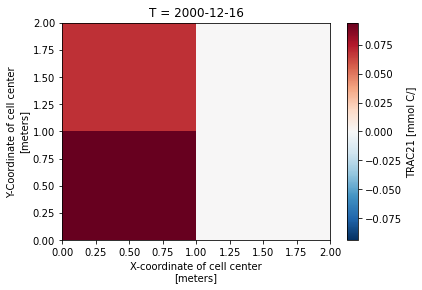

In [86]:
ds["TRAC21"].isel(T=24).plot()

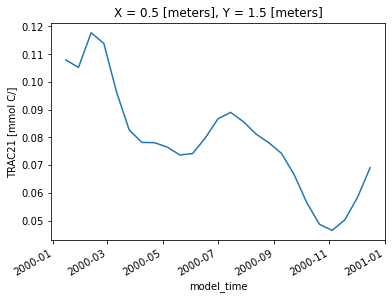

In [91]:
ds["TRAC21"].isel(X=0, Y=1).plot()

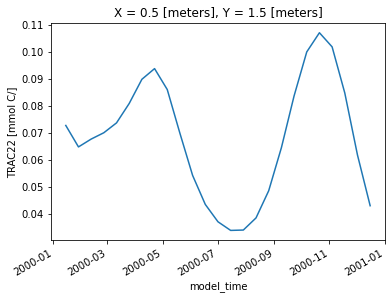

In [92]:
ds["TRAC22"].isel(X=0, Y=1).plot()

# Can I open the bin files created by Julia?

In [94]:
file_name="/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/run/tracer_bin_test_config/run/my_resources/my_tracer_inits/TRAC01_init.bin"
open_bin_file_float(file_name)



(1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0)